## **TASK 3 - Exploratory Data Analysis - Retail**
* Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'. 
* As a business manager, try to ﬁnd out the weak areas where you can work to make more proﬁt.
* What all business problems you can derive by exploring the data?

### Author - Sarath K

***Importing all necessary libraries.***

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***Reading and displaying the dataset from the SampleSuperstore dataset.***

In [3]:
data=pd.read_csv("C:\\Users\\USER\\Downloads\\SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

***There is no null value present in our data set***

In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
data["Country"].value_counts(dropna=True,normalize=True)

United States    1.0
Name: Country, dtype: float64

***The Country Column only consist single value "United State" ,So we can drop the Country column***

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


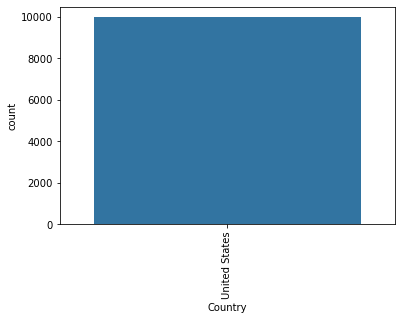

In [13]:
sns.countplot(data['Country'])
plt.xticks(rotation=90)
plt.show()

In [14]:
data.drop("Country",axis=1,inplace=True)
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


***The Country column droped***

In [15]:
data.shape

(9994, 12)

In [16]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

***Now we can check how the categorical variables depending on profit***

### Ship Mode vs Profit

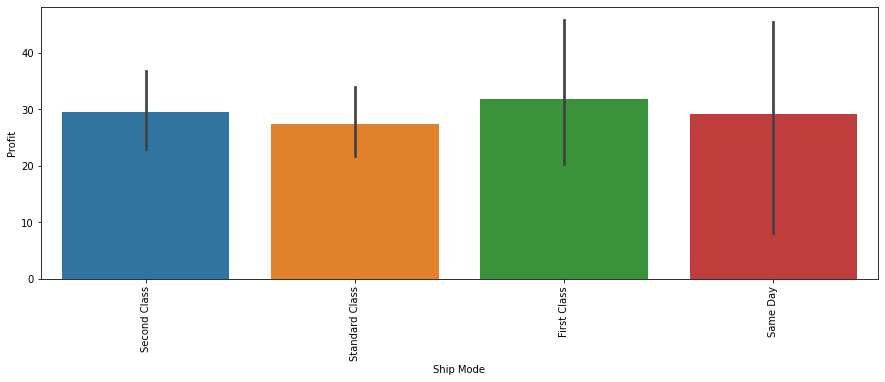

In [24]:
plt.figure(figsize=(15,5))
s1=sns.barplot(x=data["Ship Mode"], y=data["Profit"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

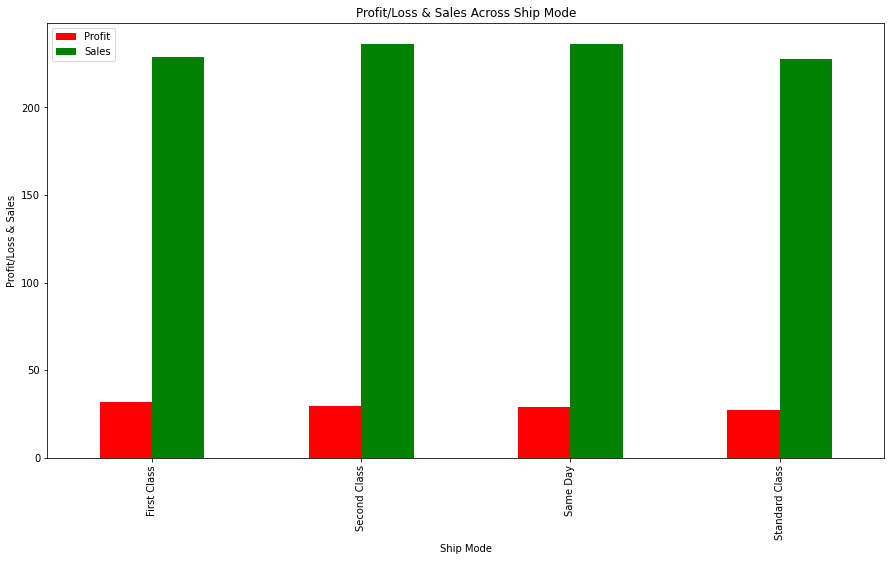

In [22]:
ps = data.groupby('Ship Mode')[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Profit/Loss & Sales')
plt.show()

***Inference : Profit is high in "first class" ship mode and low profit in "Standard Class" Ship mode***

### Segment vs Profit

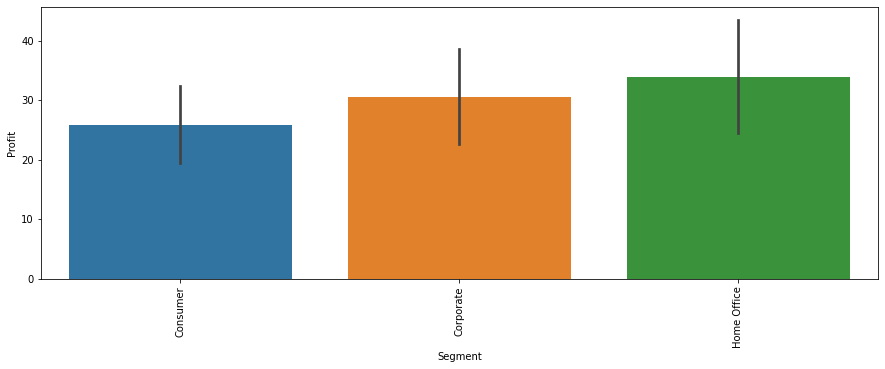

In [25]:
plt.figure(figsize=(15,5))
s1=sns.barplot(x=data["Segment"], y=data["Profit"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

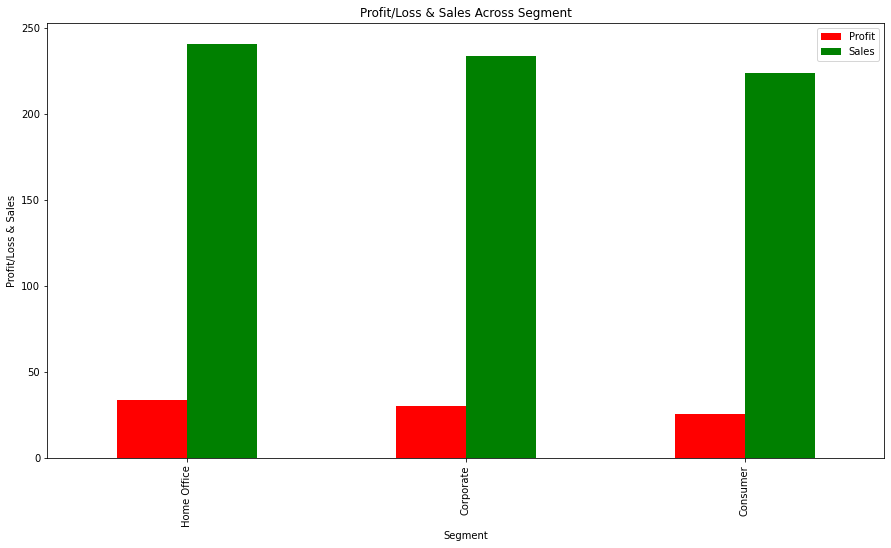

In [26]:
ps = data.groupby('Segment')[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across Segment')
plt.xlabel('Segment')
plt.ylabel('Profit/Loss & Sales')
plt.show()

***High Profit and Sales on "Home Office " Segament and lowest in Consumer segment***

### City vs Profit

***We have 531 Citys in our data set , So taking only top 5 citys and low profit citys only***

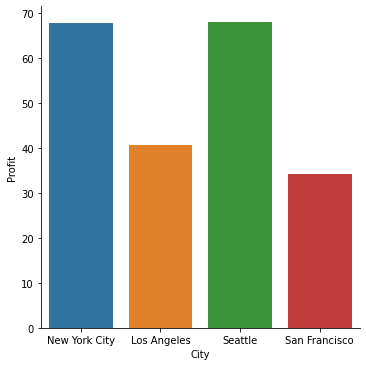

In [30]:
psf = data.groupby('City')['Profit'].sum().sort_values(ascending=False).index.values
sns.catplot(data=data, x='City',  y='Profit',kind='bar',ci=None, legend_out=False, order=psf[:4])


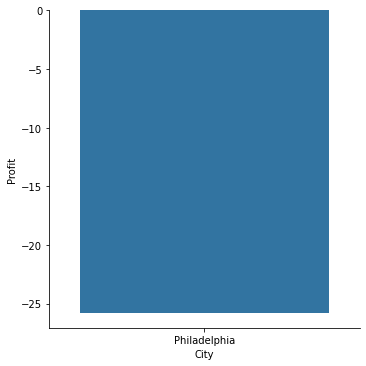

In [31]:
psf = data.groupby('City')['Profit'].sum().sort_values(ascending=False).index.values
sns.catplot(data=data, x='City',  y='Profit',kind='bar',ci=None, legend_out=False, order=psf[-1:])

***Highest Profit in "New york city" and low profit in "Philadephia city"***

### State vs Profit

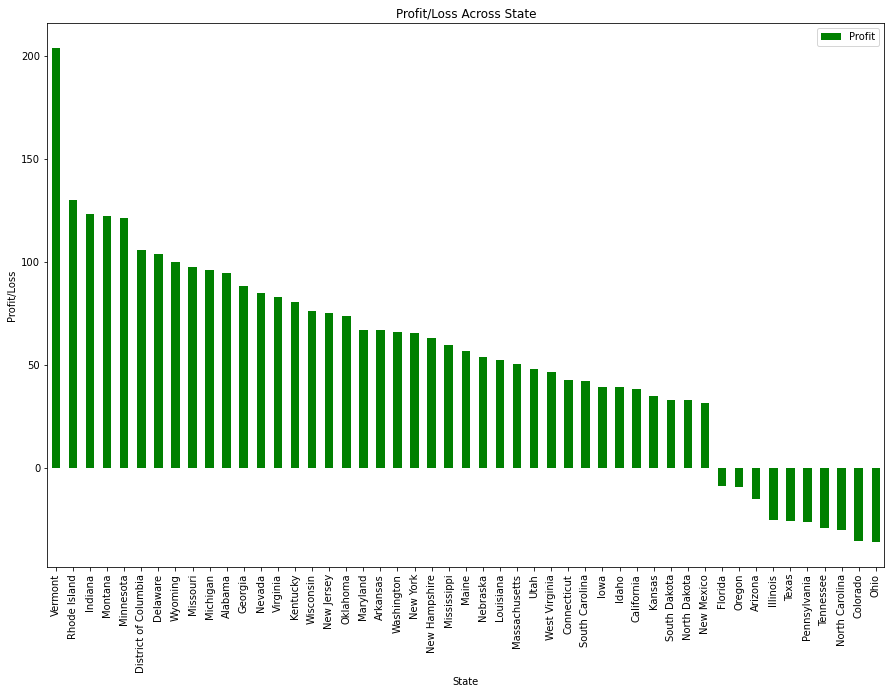

In [35]:
ps = data.groupby('State')[['Profit']].mean().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['green'],figsize=(15,10))
plt.title('Profit/Loss Across State')
plt.xlabel('State')
plt.ylabel('Profit/Loss')
plt.show()

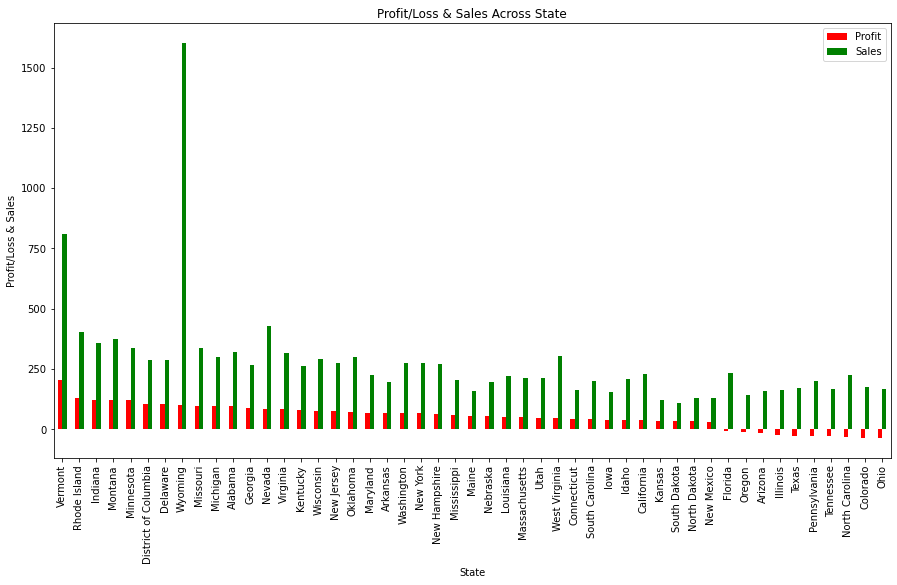

In [47]:
ps1 = data.groupby('State')[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False)
ps1[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across State')
plt.xlabel('State')
plt.ylabel('Profit/Loss & Sales')
plt.show()

***Highest Profit in "Vermont" State and lowest profit in "Ohio" state***



- **Top 3 Profit states:** 1.Vermont 2.Rhode Island 3.Indiana
- **Low Profit states:** 1.Ohio 2.Colorado 3.North Carolina
- **To increse profit focus sales on top profiting states and reduce sales on low profit states there is 10 state has negative profit value**




### Region vs Profit

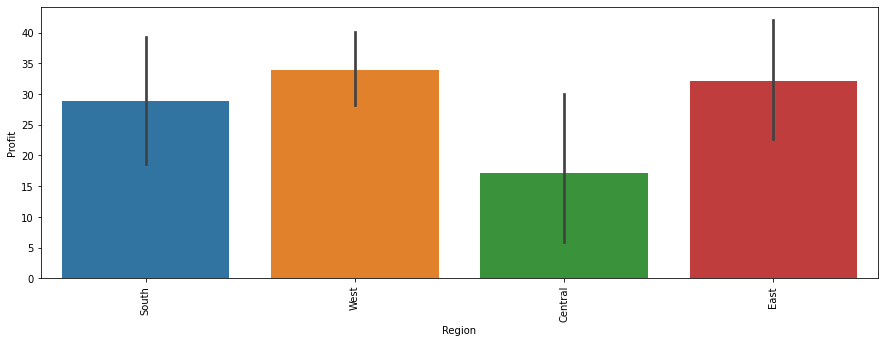

In [37]:
plt.figure(figsize=(15,5))
s1=sns.barplot(x=data["Region"], y=data["Profit"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

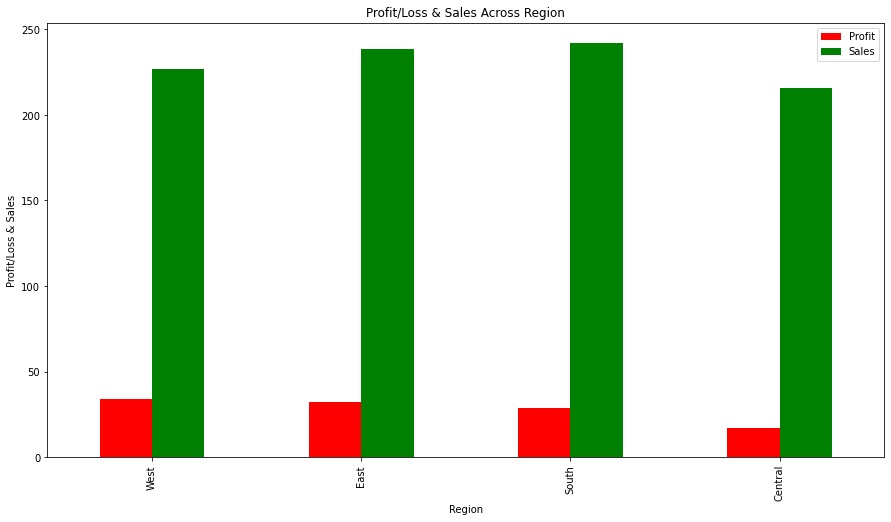

In [38]:
ps = data.groupby('Region')[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across Region')
plt.xlabel('Region')
plt.ylabel('Profit/Loss & Sales')
plt.show()

***Highest Profit in "West" Region and lowest profit in "Central" Region***


## Category vs Profit

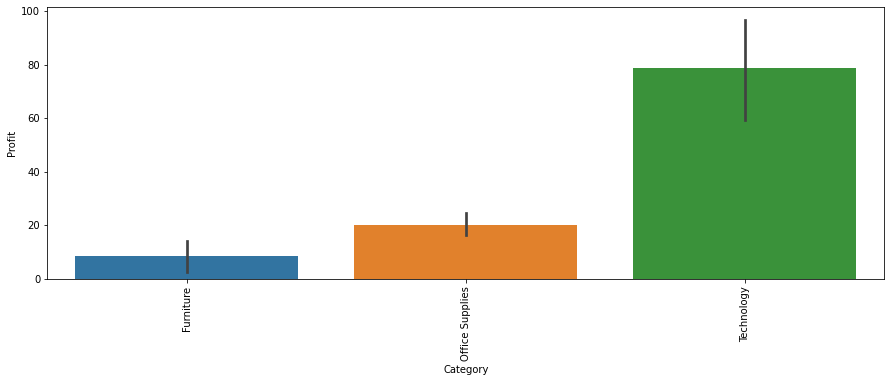

In [39]:
plt.figure(figsize=(15,5))
s1=sns.barplot(x=data["Category"], y=data["Profit"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

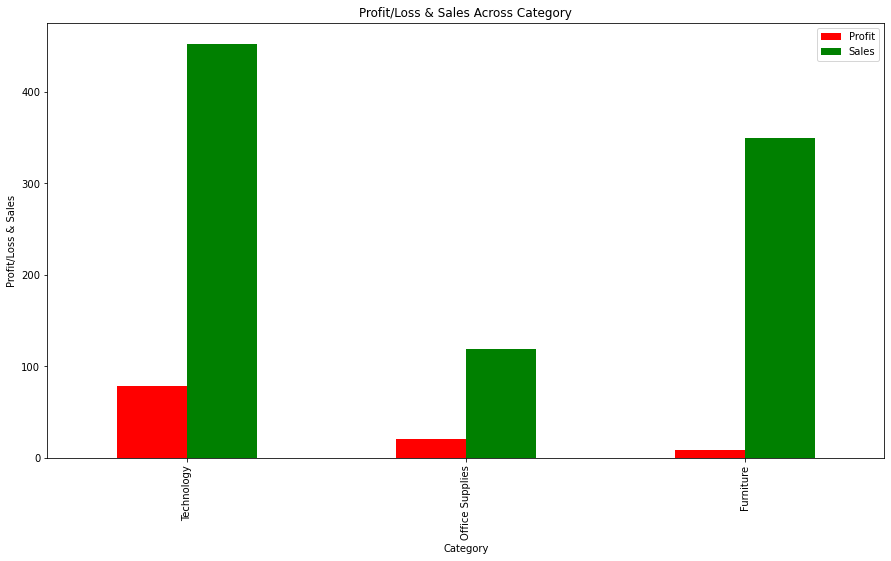

In [40]:
ps = data.groupby('Category')[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across Category')
plt.xlabel('Category')
plt.ylabel('Profit/Loss & Sales')
plt.show()

***Highest Profit in "Technology" Category and lowest profit in "Furniture" Category***


## Sub- Category vs Profit

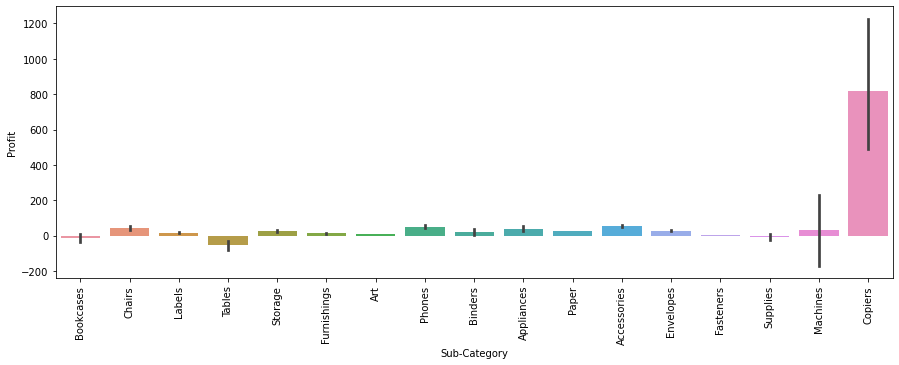

In [41]:
plt.figure(figsize=(15,5))
s1=sns.barplot(x=data["Sub-Category"], y=data["Profit"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

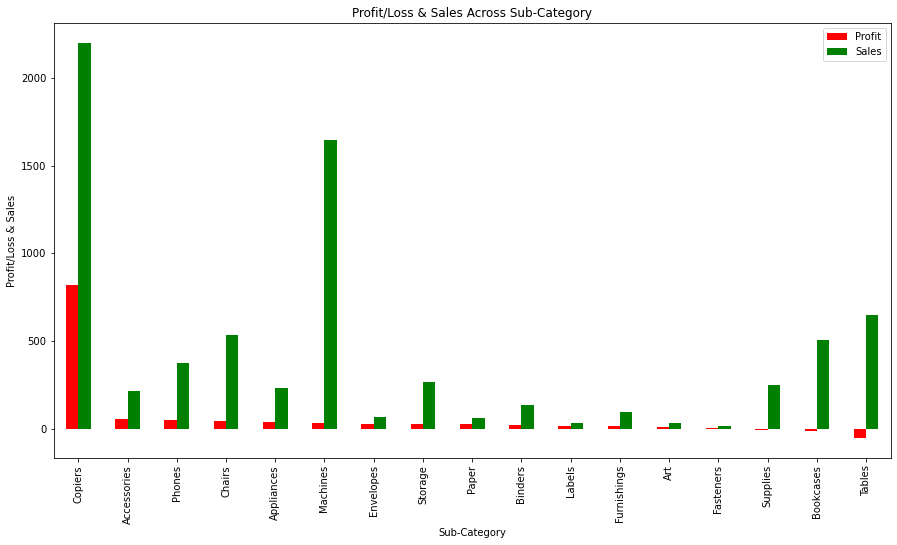

In [43]:
ps = data.groupby('Sub-Category')[['Profit','Sales']].mean().sort_values(by='Profit',ascending=False)
ps[:].plot.bar(color=['red','green'],figsize=(15,8))
plt.title('Profit/Loss & Sales Across Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss & Sales')
plt.show()

***Highest Profit in "Coipers" Sub-Category and lowest profit in "Tables" Sub-Category***


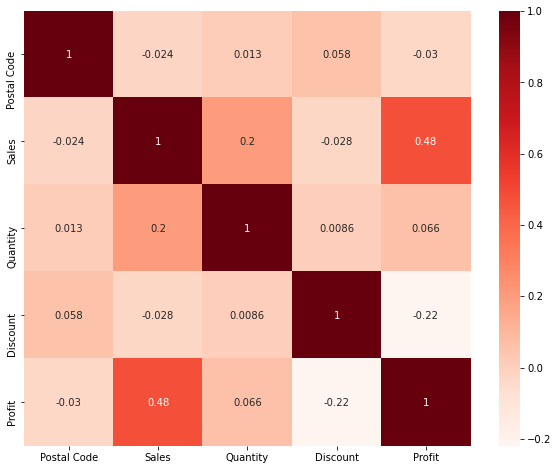

In [44]:
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(data.corr(), cmap="Reds",annot=True)
plt.show()

***This heatmap shows that:***
- Sales and Profit are Positievly Correlated.
- Discount and Profit are Negatively Correlated
- Quantity and Profit are less Moderately Correlated

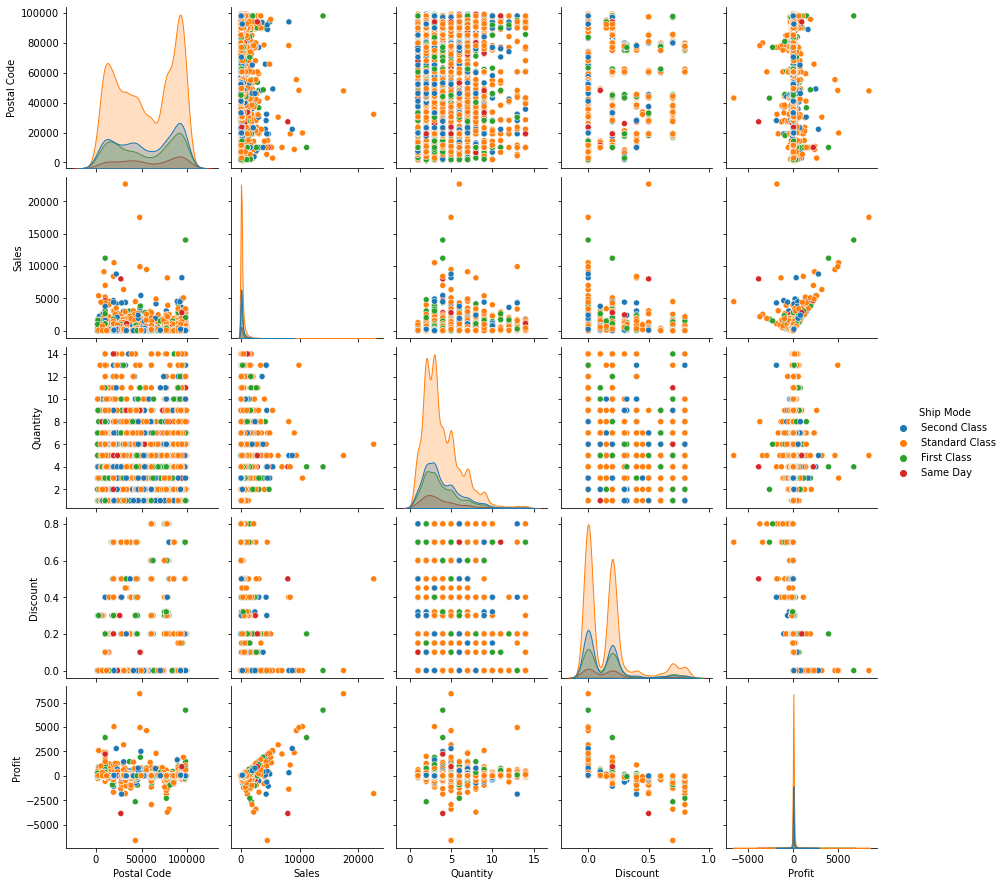

In [45]:
sns.pairplot(data,hue='Ship Mode')

### Total Sales Comparision 

Text(0.5, 1.0, 'State Wise Analysis')

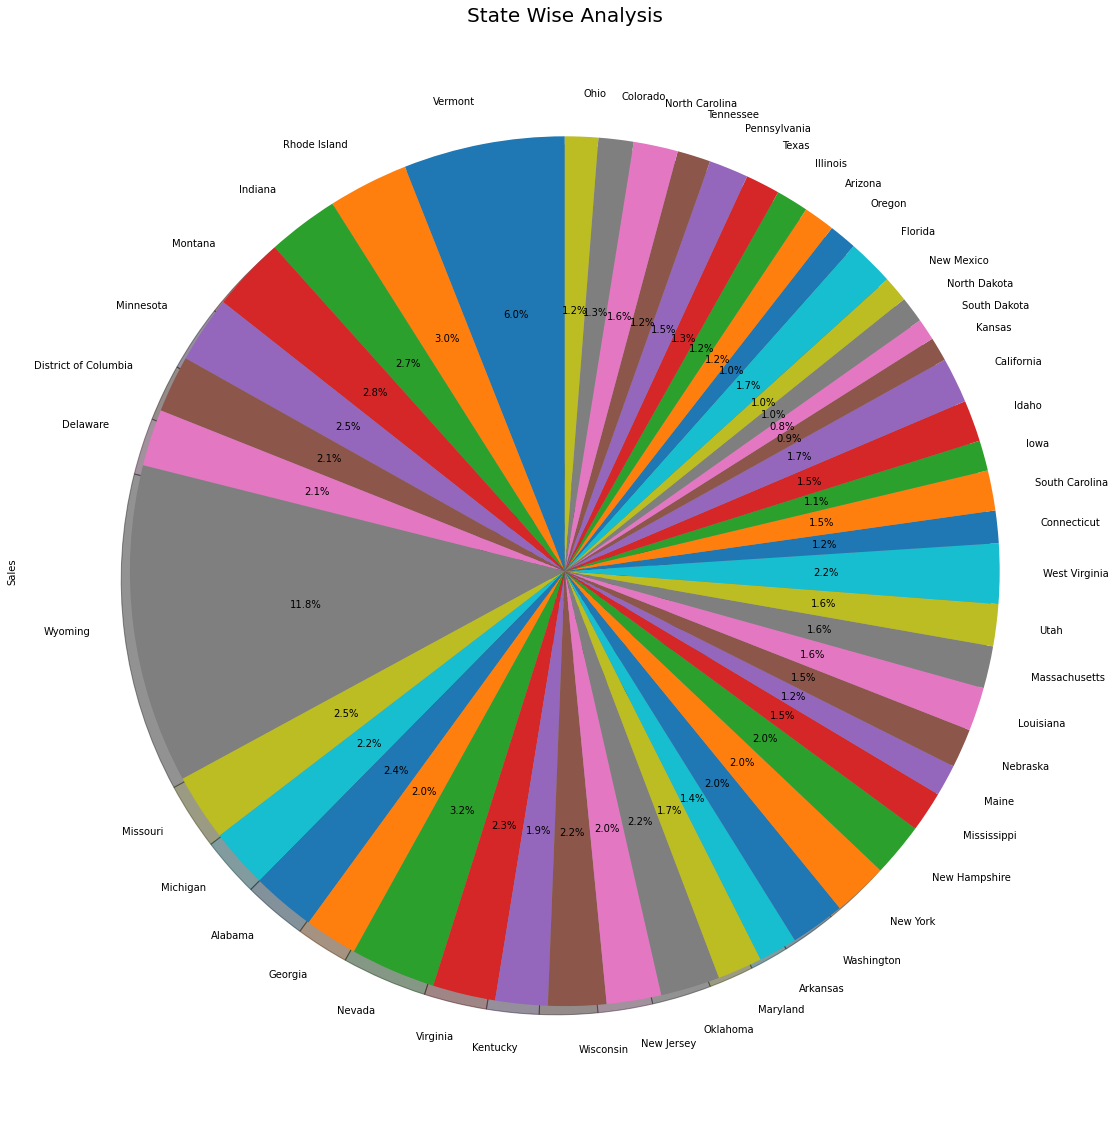

In [48]:
ps1['Sales'].plot(kind='pie',
                        figsize = (20,20),
                        autopct='%1.1f%%',
                        startangle=90,     # start angle 90° (Africa)
                        shadow=True)
plt.title('State Wise Analysis',fontsize=20)

In [49]:
ps1

,Profit,Sales
State,,
Vermont,204.088936,811.760909
Rhode Island,130.100523,404.070643
Indiana,123.375411,359.431946
Montana,122.221900,372.623467
Minnesota,121.608847,335.541011
District of Columbia,105.958930,286.502000
Delaware,103.930988,285.948635
Wyoming,100.196000,1603.136000
Missouri,97.518341,336.441667


***Highest Sales in "Wyoming " State and lowest sales in "South Dakota" State***

### Observation & Conclusions.

- **Top Profit states:** 1.Vermont 2.Rhode Island 3.Indiana
- **Low Profit states:** 1.Ohio 2.Colorado 3.North Carolina
- **To increse profit focus sales on top profiting states and reduce sales on low profit states there is 10 state has negative profit value**


- **Highest Profit in "West" Region and lowest profit in "Central" Region. To increase profit focus sales on WEST Region**


- **Highest Profit in "Technology" Category and lowest profit in "Furniture" Category. Focus on Technology sales**


- **Profit is high in "first class" ship mode and low profit in "Standard Class" Ship mode**


- **High Profit and Sales on "Home Office " Segament and lowest in Consumer segment**


- **Highest Profit in "New york city" and low profit in "Philadephia city". There are 10 citys has negative profit or no profit**


- **Highest Profit in "Coipers" Sub-Category and lowest profit in "Tables" Sub-Category**


- **Highest Sales in "Wyoming " State and lowest sales in "South Dakota" State**


- **From Heat map -**
- **Sales and Profit are Positievly Correlated.**
- **Discount and Profit are Negatively Correlated**
- **Quantity and Profit are less Moderately Correlated**

***Thank You!***